### 1 - Problem Statement


##### The goal of this project is to conduct a comprehensive analysis of the provided data and develop a robust predictive model for accurately forecasting sales of products in various outlets. By exploring and understanding the data, we aim to identify key factors influencing sales and utilize this knowledge to build a reliable model that can predict product sales with a high level of accuracy. The ultimate objective is to leverage data-driven insights to optimize sales strategies, inventory management, and decision-making processes in order to drive revenue growth and enhance overall business performance.

### 2 - Hypothesis Generation

1. Product Type Hypothesis: We hypothesize that certain product types will have a higher demand and sales volume compared to others. By analyzing the sales data, we expect to identify specific product categories that exhibit stronger sales performance.

2. Price Impact Hypothesis: We anticipate that product pricing will have a significant influence on sales. Through data analysis, we aim to uncover any price thresholds or optimal price ranges that maximize sales and revenue.

3. Outlet Location Hypothesis: We hypothesize that the location of outlets plays a role in sales performance. By analyzing sales data in relation to outlet location types (rural, urban, suburban), we expect to identify any patterns or variations in sales across different areas.

4. Outlet Type Hypothesis: We anticipate that different outlet types (supermarkets, convenience stores, hypermarkets) will have varying sales patterns. Through analysis, we aim to identify the outlet types that exhibit the highest sales potential.

By testing and validating these hypotheses using the provided sales data, we seek to gain a deeper understanding of the underlying factors that drive sales. This knowledge will be used to develop an accurate predictive model that can forecast sales for different products and outlets, ultimately aiding in informed decision-making and optimizing business strategies.






### 3 - Loading Packages and Data


In [1]:
import pandas as pd  # Importing the pandas library for data manipulation and analysis.

import numpy as np  # Importing the numpy library for numerical computations and array operations.

import matplotlib.pyplot as plt  # Importing the matplotlib library for creating visualizations.

import seaborn as sns  # Importing the seaborn library for advanced data visualizations.

import warnings  # Importing the warnings module to manage warning messages.

import os  # Importing the os module for interacting with the operating system.

import re  # Importing the re module for regular expression operations.

import nltk  # Importing the nltk library for natural language processing tasks.

from nltk.corpus import stopwords  # Importing the stopwords corpus from nltk to remove common words.

from nltk.stem import PorterStemmer  # Importing the PorterStemmer from nltk for word stemming.

from nltk.tokenize import word_tokenize  # Importing the word_tokenize function from nltk for tokenization.

from sklearn.feature_extraction.text import CountVectorizer  # Importing the CountVectorizer from scikit-learn for text feature extraction.

from sklearn.feature_extraction.text import TfidfVectorizer  # Importing the TfidfVectorizer from scikit-learn for TF-IDF feature extraction.

from sklearn.metrics import confusion_matrix  # Importing the confusion_matrix function from scikit-learn for evaluating classification results.

from sklearn.metrics import classification_report  # Importing the classification_report function from scikit-learn for evaluating classification results.

from sklearn.metrics import accuracy_score  # Importing the accuracy_score function from scikit-learn for evaluating classification accuracy.

from sklearn.model_selection import train_test_split  # Importing the train_test_split function from scikit-learn for splitting the data into training and testing sets.


In [2]:
data = pd.read_csv('Train.csv')


### 4 - Data Structure and Content


In [3]:
data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility   
0           FDA15         9.30          Low Fat         0.016047  \
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier   
0                  Dairy  249.8092            OUT049  \
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type   
0                       1999      Medium               Tier 1  \
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [4]:
data.tail()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility   
8518           FDF22        6.865          Low Fat         0.056783  \
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

               Item_Type  Item_MRP Outlet_Identifier   
8518         Snack Foods  214.5218            OUT013  \
8519        Baking Goods  108.1570            OUT045   
8520  Health and Hygiene   85.1224            OUT035   
8521         Snack Foods  103.1332            OUT018   
8522         Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type   
8518                       1987        High               Tier 3  \
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700

In [5]:
data.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year   
count  7060.000000      8523.000000  8523.000000                8523.000000  \
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
data.duplicated().sum()

0

Based on this information, we can conclude that there are missing values in the (Item_Weight and Outlet_Size columns). These missing values will need to be addressed during the data cleaning and preprocessing steps. Additionally, we have numeric features such as weights, visibility, MRP, establishment year, and sales amount, which will be useful for analysis and modeling. The object type columns likely represent categorical features that may require encoding for further analysis and modeling. Further more there seems to be no duplicate values in the data.

### 5 - Exploratory Data Analysis


/var/folders/78/ncf35q9d2r5fttvytl10cq1h0000gn/T/ipykernel_46263/3878036118.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Weight'])


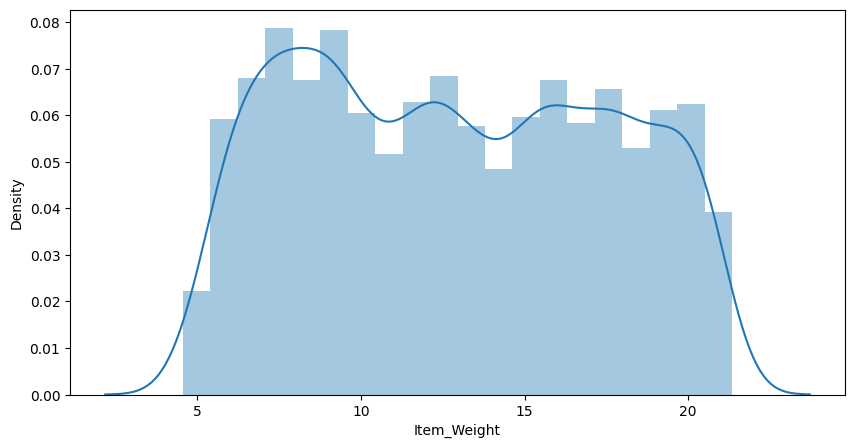

In [9]:
# in this step we will visualize the data to get a better understanding of it
# starting with the Item_Weight column
plt.figure(figsize=(10, 5))
sns.distplot(data['Item_Weight'])
plt.show()

This graph shows that the item weight is relativly simmilar between most items thus can give us a clue to fill in the missing values with the mean of the data since it will not be far of the accual wieght of the item

In [10]:
Item_Fat_Content_count = data['Item_Fat_Content'].value_counts()

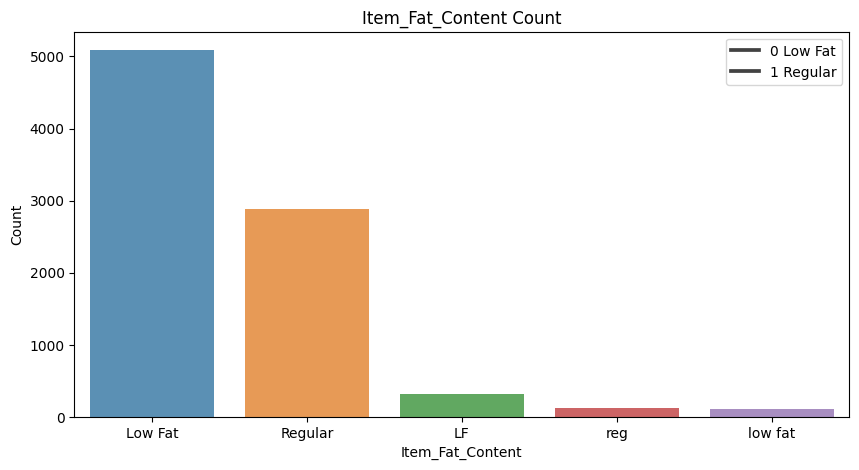

In [11]:
# next looking at the Item_Fat_Content column for the count of each value
plt.figure(figsize=(10, 5))
sns.barplot(x=Item_Fat_Content_count.index, y=Item_Fat_Content_count.values, alpha=0.8)
plt.title('Item_Fat_Content Count')
plt.ylabel('Count')
plt.xlabel('Item_Fat_Content')
plt.legend(labels=['0 Low Fat', '1 Regular'])  # Specify the labels for the legend

plt.show()


This graph shows that there are more low fat items than regular fat, whether this has an effect on sales of the item is yet to be determined in the univariate analysis
it also shows some inconsistency in the data.


/var/folders/78/ncf35q9d2r5fttvytl10cq1h0000gn/T/ipykernel_46263/3806082241.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Visibility'])


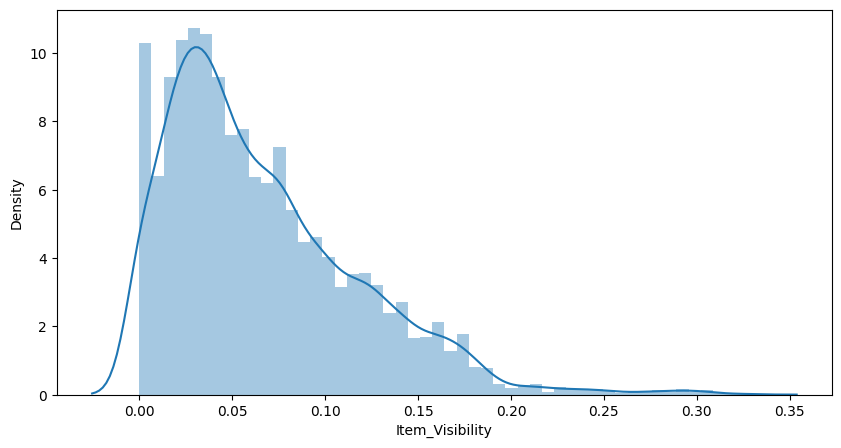

In [12]:
# next looking at the item_visibility column
plt.figure(figsize=(10, 5))
sns.distplot(data['Item_Visibility'])
plt.show()


Item visability represents how much an item is displayed on the shelfs which can impact customer choice to buy it which inturn dirictly impacts the sales of the item.
It makes sence that most items have low visability since the only some chosen items get the spot light on the shelfs. We can also assume that this column will have dirict impact on sales and a dirict correlation with it but this can not be determind before the univaraint analysis.

In [13]:
# next looking at the Item_Type column for the count of each value
Item_Type_count = data['Item_Type'].value_counts()

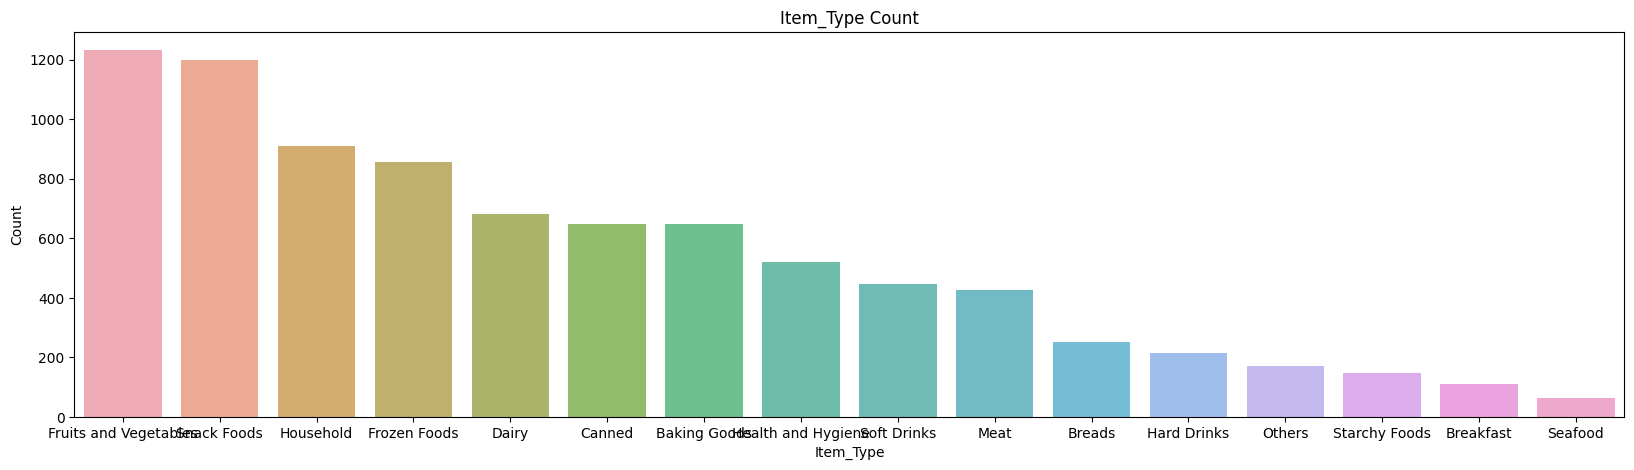

In [14]:
plt.figure(figsize=(20, 5))
sns.barplot(x=Item_Type_count.index, y=Item_Type_count.values, alpha=0.8)
plt.title('Item_Type Count')
plt.ylabel('Count')
plt.xlabel('Item_Type')

plt.show()


This shows that the most (fruits and vegetables , snack foods) are the most type of items present, whether this is also affects the sales will be determind later

/var/folders/78/ncf35q9d2r5fttvytl10cq1h0000gn/T/ipykernel_46263/1736527021.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_MRP'])


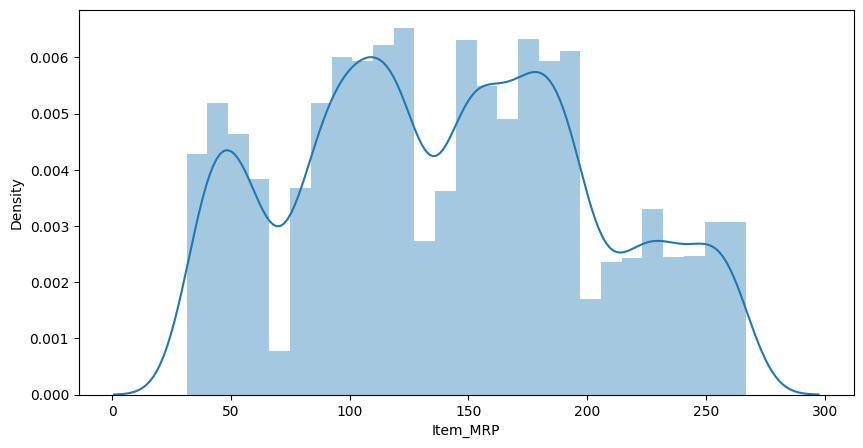

In [15]:
# next looking at the item_mrp column
plt.figure(figsize=(10, 5))
sns.distplot(data['Item_MRP'])
plt.show()


This shows a huge difference in the MRP of the items but it may be a good idea to look at each outlet separately since not all of them are the same size

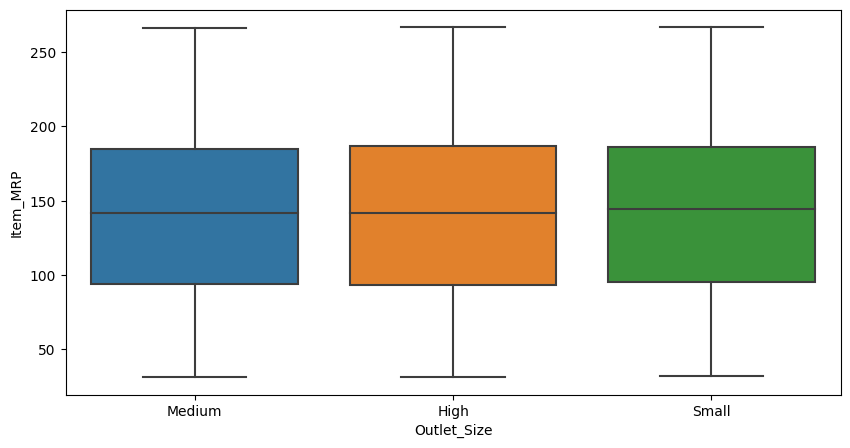

In [16]:
# Looking at the item MRP for each outlet size
plt.figure(figsize=(10, 5))
sns.boxplot(x='Outlet_Size', y='Item_MRP', data=data)
plt.show()


they seem to have a very simmilar disstribution between them which is not what we expected but this shows that the size of the outlet probably has no effect on the items sold in it

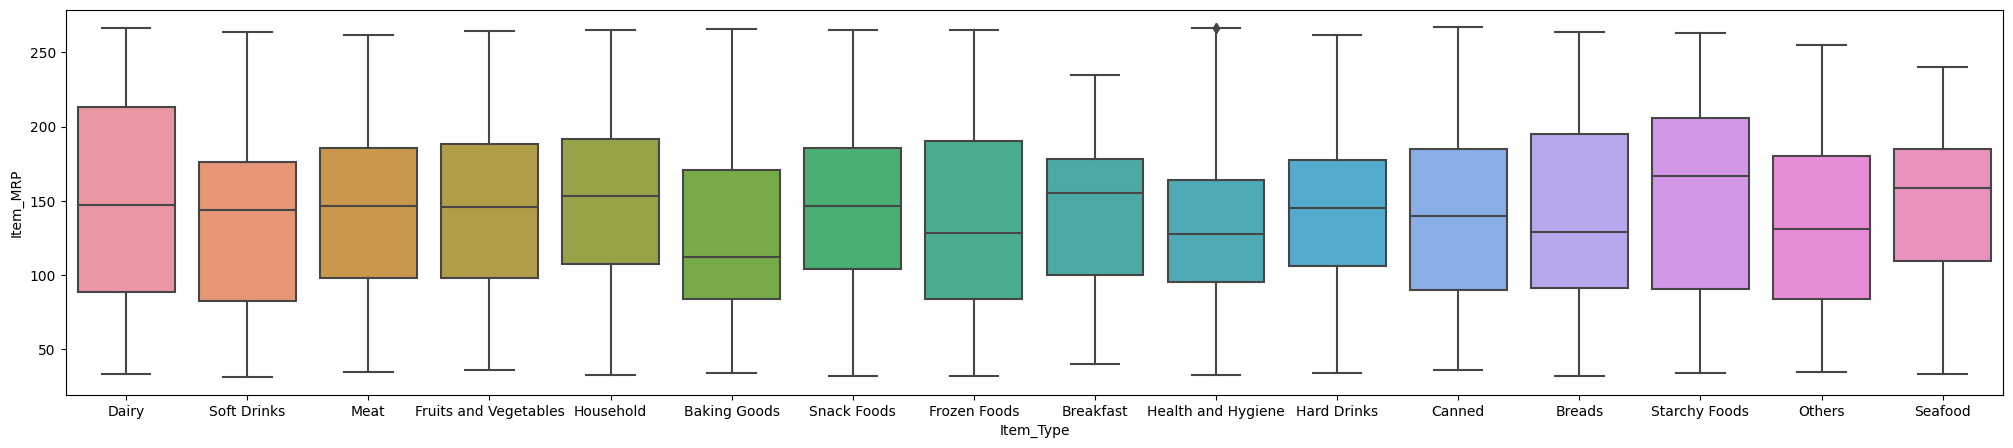

In [17]:
# looking at the different item type and their MRP
plt.figure(figsize=(25, 5))
sns.boxplot(x='Item_Type', y='Item_MRP', data=data)
plt.show()


although there are differences in their distributions it does not seem that it makes that much difference of the item, meaning that despite outlet size and item type the MRP of the item can flucuate very roughly from very high to very low

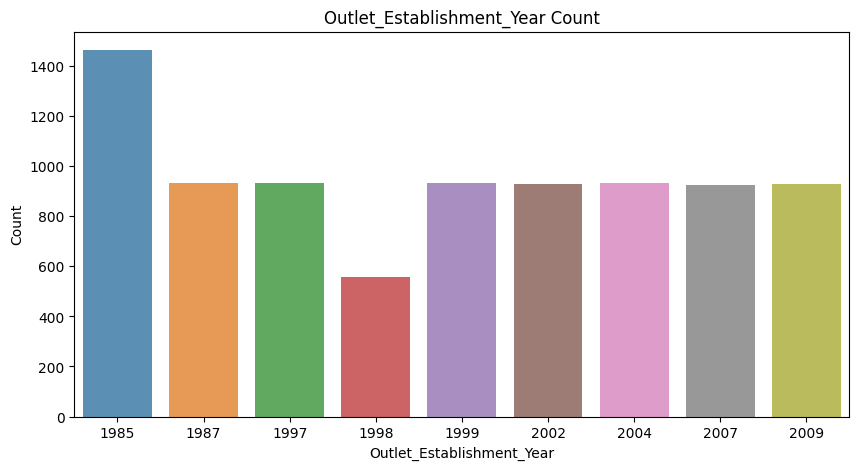

In [18]:
# next looking at the Outlet_Establishment_Year column for the count of each value
Outlet_Establishment_Year_count = data['Outlet_Establishment_Year'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=Outlet_Establishment_Year_count.index, y=Outlet_Establishment_Year_count.values, alpha=0.8)
plt.title('Outlet_Establishment_Year Count')
plt.ylabel('Count')
plt.xlabel('Outlet_Establishment_Year')
plt.show()


Although there is a high outlet establishment number in the year 1985 the data is very similar in the next years, exept for the year 1998 which may warrent a further investigation 

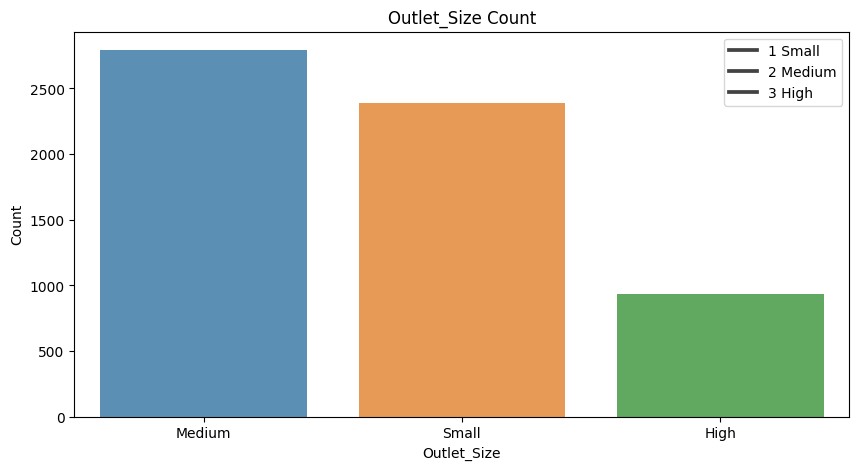

In [19]:
# next looking at the Outlet_Size column for the count of each value
Outlet_Size_count = data['Outlet_Size'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=Outlet_Size_count.index, y=Outlet_Size_count.values, alpha=0.8)
plt.title('Outlet_Size Count')
plt.ylabel('Count')
plt.xlabel('Outlet_Size')
plt.legend(labels=['1 Small', '2 Medium','3 High' ]) # Specify the labels for the legend
plt.show()

The plot shows a normal distribution of most outlets being of the medium size meaning which may show warrent to why we have seen a broad range of MRP for the items earlier

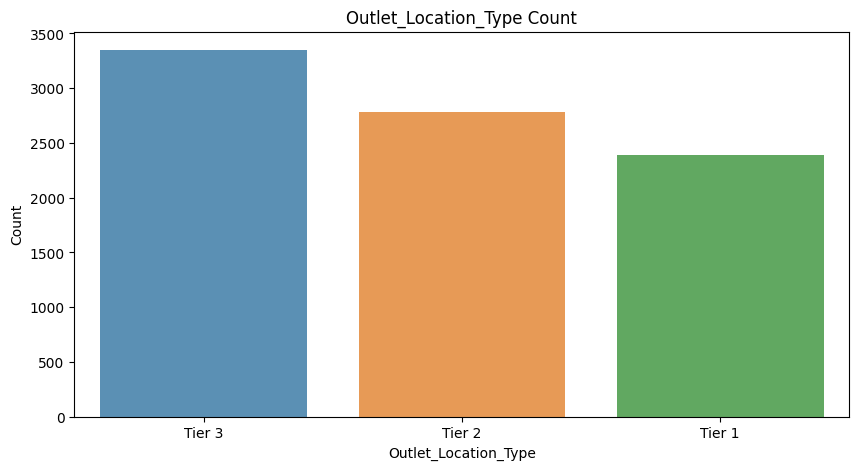

In [20]:
# next looking at the Outlet_Location_Type column for the count of each value
Outlet_Location_Type_count = data['Outlet_Location_Type'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=Outlet_Location_Type_count.index, y=Outlet_Location_Type_count.values, alpha=0.8)
plt.title('Outlet_Location_Type Count')
plt.ylabel('Count')
plt.xlabel('Outlet_Location_Type')
plt.show()


It seems that we have a big number of type 2 outlet locations

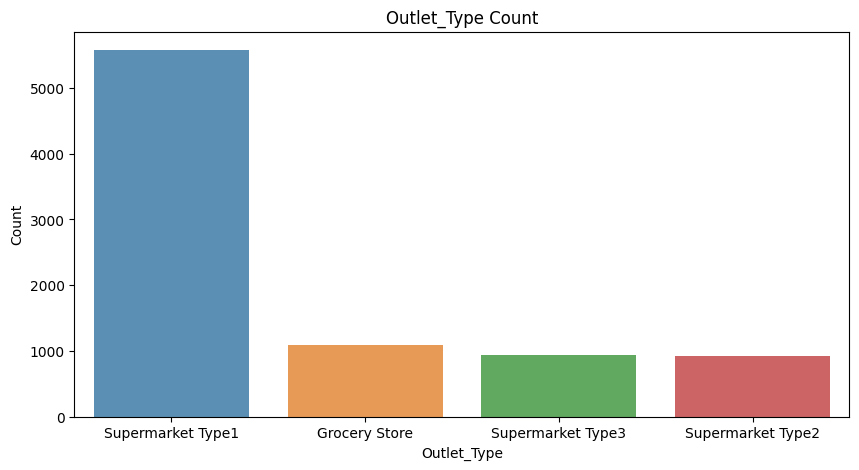

In [21]:
# next looking at the Outlet_Type column for the count of each value
Outlet_Type_count = data['Outlet_Type'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=Outlet_Type_count.index, y=Outlet_Type_count.values, alpha=0.8)
plt.title('Outlet_Type Count')
plt.ylabel('Count')
plt.xlabel('Outlet_Type')
plt.show()

The supermarket type 1 seems to be dominating which may have effects on the data but that is yet to be determinind 

### 6 - Univariate Analysis

In this part we will start analyzing the data from the perspective of each atterbute and the target variable

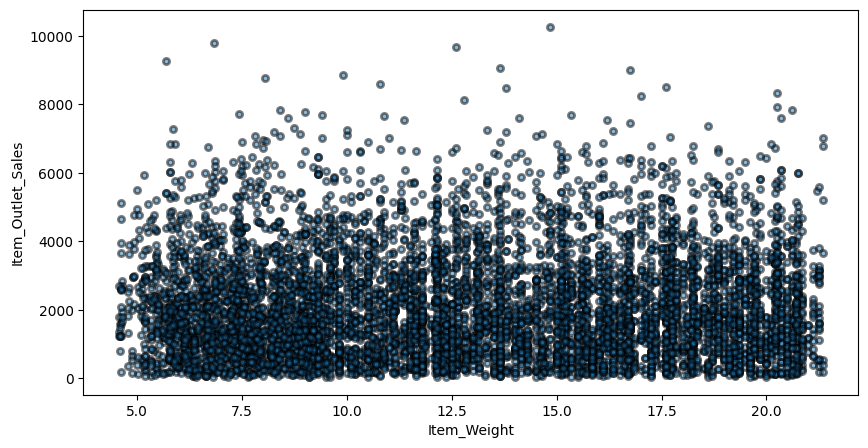

In [22]:
# so we will start again with the item weight 
# let us make a scatter plot between the item weight and item outlet sales
plt.figure(figsize=(10, 5))
plt.scatter(data['Item_Weight'], data['Item_Outlet_Sales'],alpha=0.5, s=20, edgecolors='black', linewidths=2, label='Item_Weight')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()


The item weight seems to be clustered in no particular order and there seems to be no distinct outlier item 

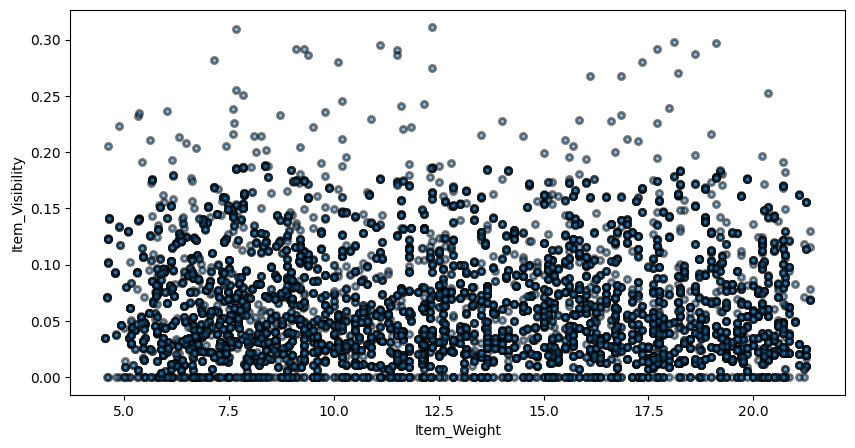

In [23]:
# let us examine item weight and all the other numerical attributes in different plots
plt.figure(figsize=(10, 5))
plt.scatter(data['Item_Weight'], data['Item_Visibility'],alpha=0.5, s=20, edgecolors='black', linewidths=2, label='Item_Visibility')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Visibility')

plt.show()


This shows that that the item visablity may have dirict correlations with the outlet_sales since they resemble the same distribution

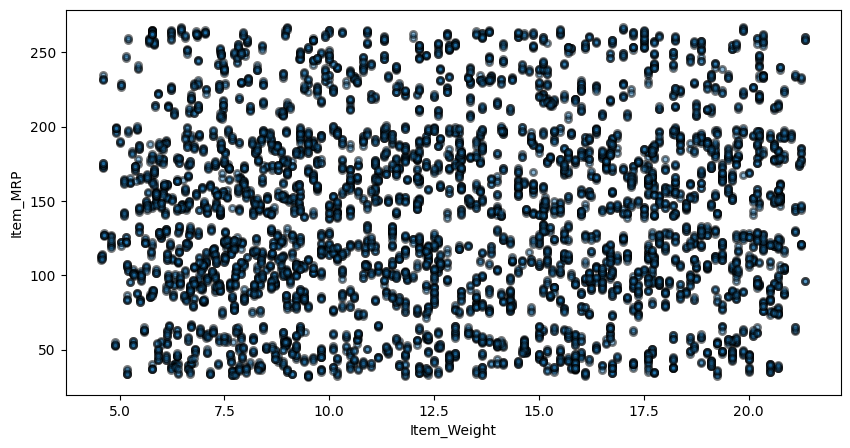

In [24]:
# let us look at item weight and item MRP
plt.figure(figsize=(10, 5))
plt.scatter(data['Item_Weight'], data['Item_MRP'],alpha=0.5, s=20, edgecolors='black', linewidths=2, label='Item_MRP')
plt.xlabel('Item_Weight')
plt.ylabel('Item_MRP')

plt.show()

There seems to be a clustering pattern which may leed to the k-nearest nightbours algorthim may work well

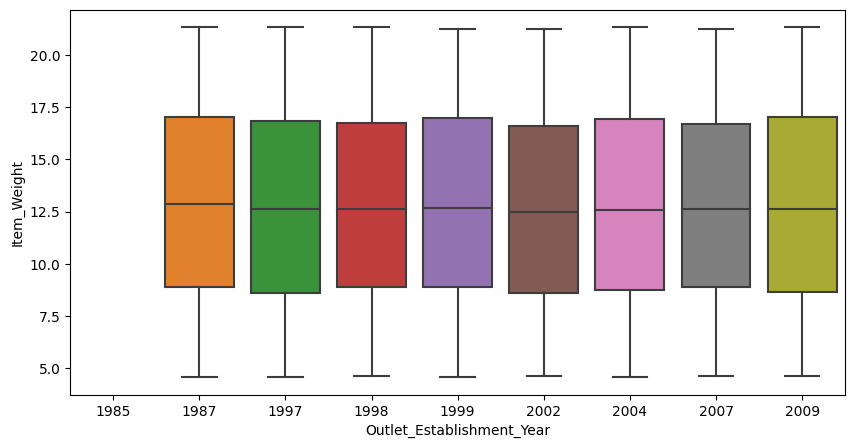

In [25]:
# next let us look at item weight and outlet establishment year since this is a categorical variable we will use a box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='Outlet_Establishment_Year', y='Item_Weight', data=data)
plt.show()


It seems to be that there are no values for the item weight in the year 1985

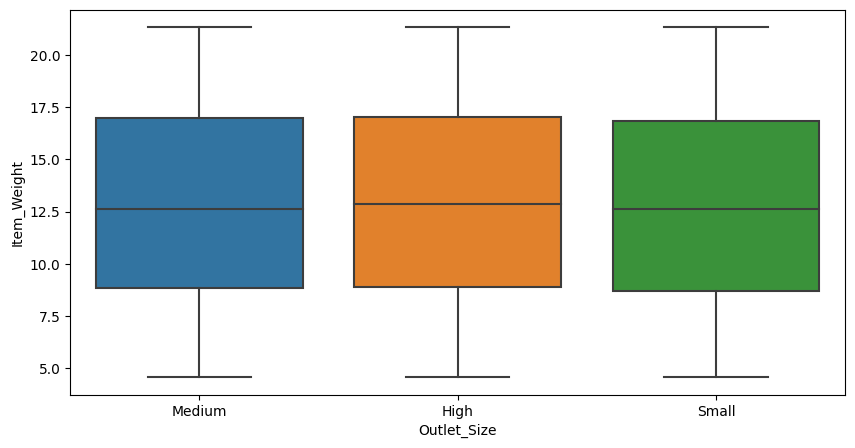

In [26]:
# next let us look at item weight and outlet size since this is a categorical variable we will use a box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='Outlet_Size', y='Item_Weight', data=data)
plt.show()


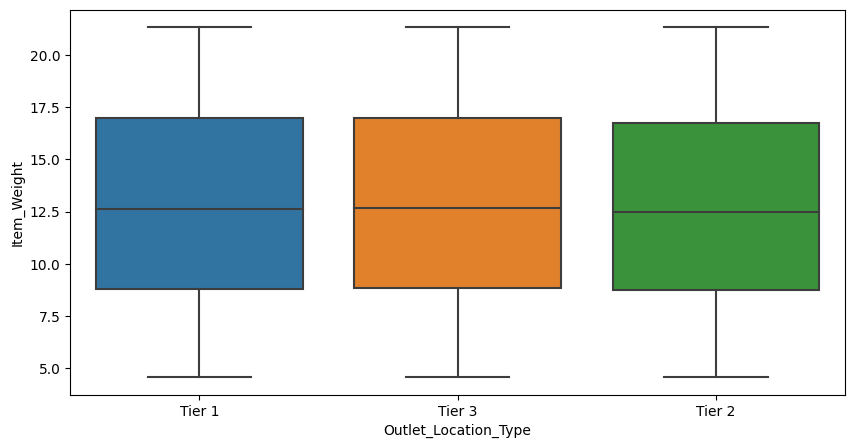

In [27]:
# next let us look at item weight and outlet location type 
plt.figure(figsize=(10, 5))
sns.boxplot(x='Outlet_Location_Type', y='Item_Weight', data=data)
plt.show()



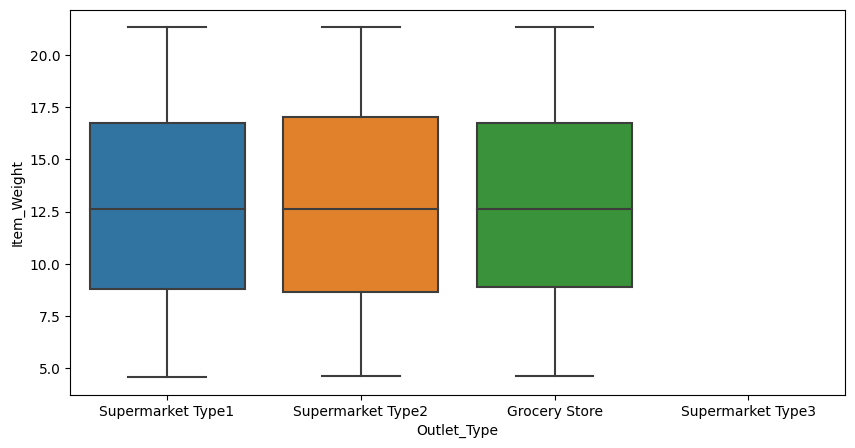

In [28]:
# next let us look at item weight and outlet type
plt.figure(figsize=(10, 5))
sns.boxplot(x='Outlet_Type', y='Item_Weight', data=data)
plt.show()


from the looking at the item weight we can see that the outlet type 3 is missing and the year 1985 is also missing which may give us a lead when filling the na data in this column

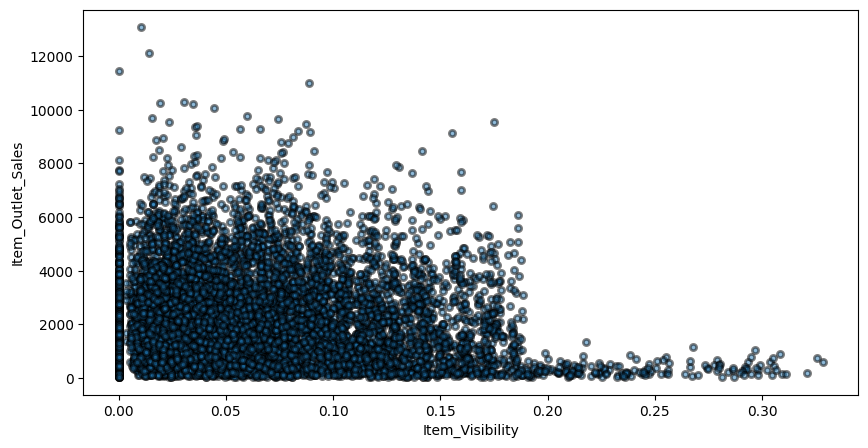

In [29]:
# next let us look at item visibility and item outlet sales
plt.figure(figsize=(10, 5))
plt.scatter(data['Item_Visibility'], data['Item_Outlet_Sales'],alpha=0.5, s=20, edgecolors='black', linewidths=2, label='Item_Outlet_Sales')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

In [30]:
# there seems to be some outliers in the item visibility column so let us remove them
item_visibility_count = data[data['Item_Visibility'] < 0.2].count()

# getting the percentage of the data that is less than 0.2
item_visibility_count_percentage = 100 -(item_visibility_count / data.shape[0] * 100).round(2)
item_visibility_count_percentage[0]


1.5699999999999932

so 1.6% of the data is more than 0.2 so we will not remove it

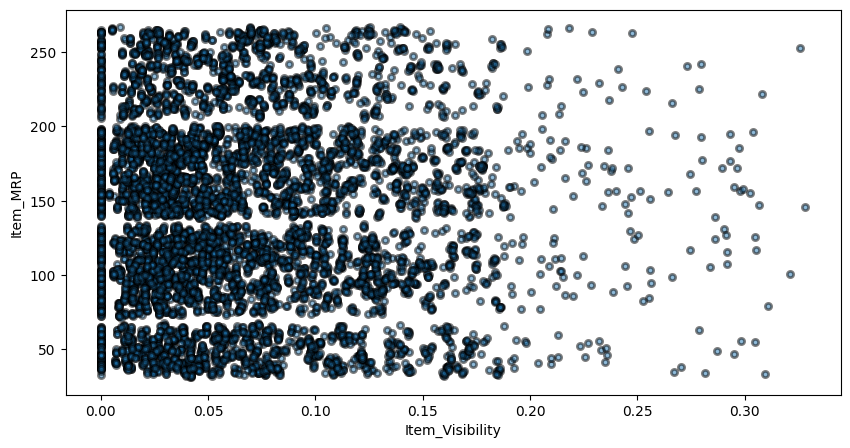

In [31]:
# next let us look at item visibility and item MRP
plt.figure(figsize=(10, 5))
plt.scatter(data['Item_Visibility'], data['Item_MRP'],alpha=0.5, s=20, edgecolors='black', linewidths=2, label='Item_MRP')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_MRP')
plt.show()


There seems to be so creedance to the data being less clustered after the 0.20 mark

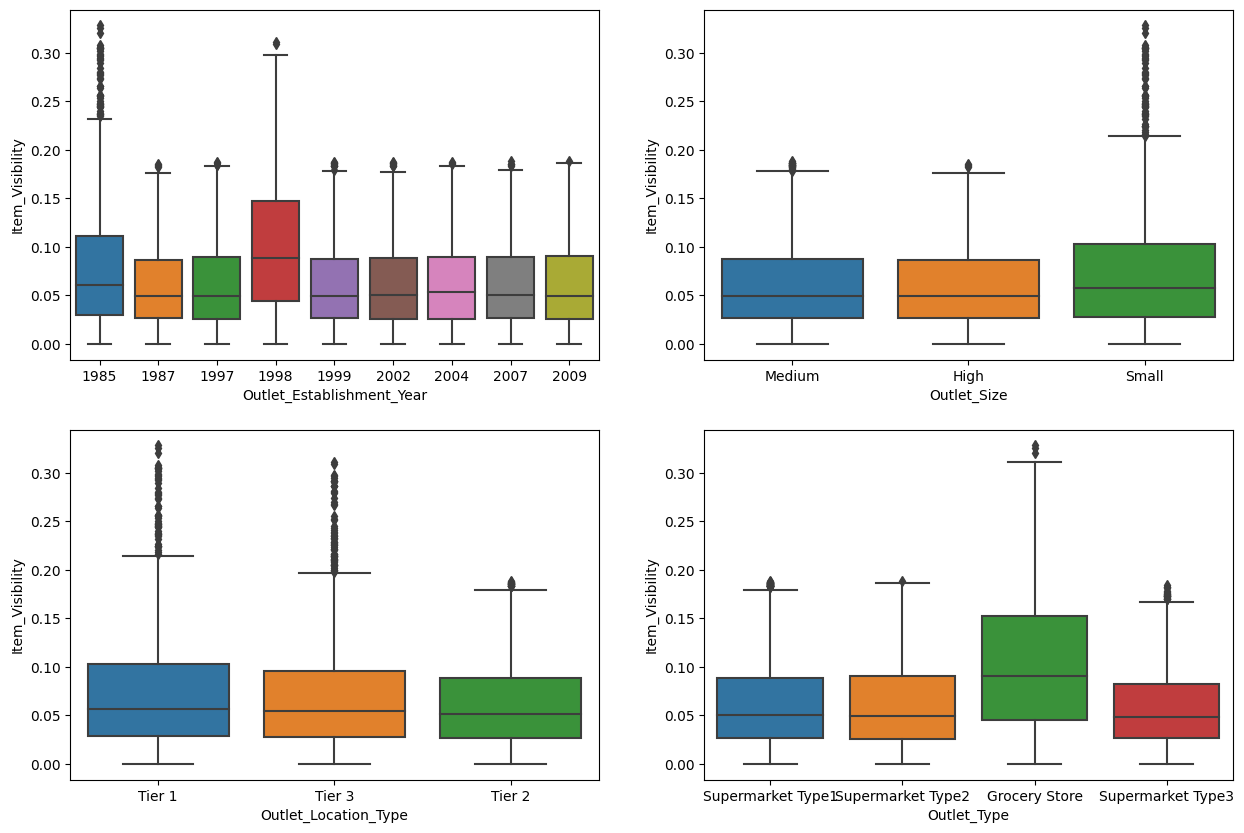

In [32]:
# next let us look at item visibility and categorical variables using subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(ax=axes[0, 0], x='Outlet_Establishment_Year', y='Item_Visibility', data=data)
sns.boxplot(ax=axes[0, 1], x='Outlet_Size', y='Item_Visibility', data=data)
sns.boxplot(ax=axes[1, 0], x='Outlet_Location_Type', y='Item_Visibility', data=data)
sns.boxplot(ax=axes[1, 1], x='Outlet_Type', y='Item_Visibility', data=data)
plt.show()

The intersting graphs is with outlet_type at the 0 and outlet_establishment_year at the 1998 year

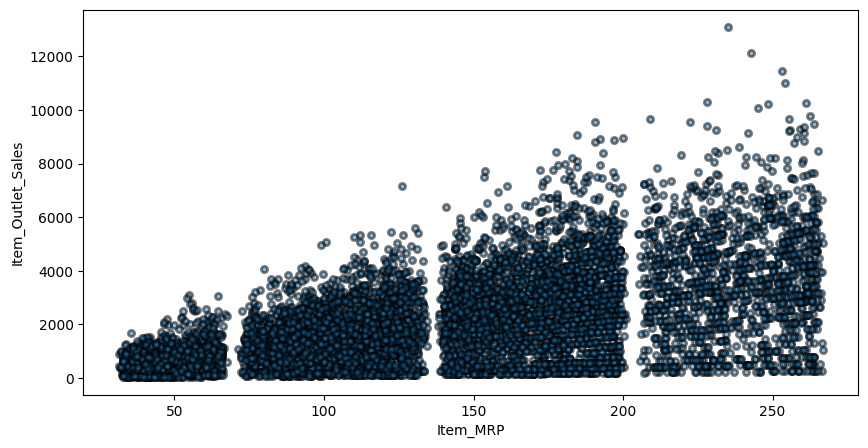

In [33]:
# next let us look at item MRP and item outlet sales
plt.figure(figsize=(10, 5))
plt.scatter(data['Item_MRP'], data['Item_Outlet_Sales'],alpha=0.5, s=20, edgecolors='black', linewidths=2, label='Item_Outlet_Sales')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()


The data looks clusterd and seems to have a very dirict coorelation with item_outlet_sales

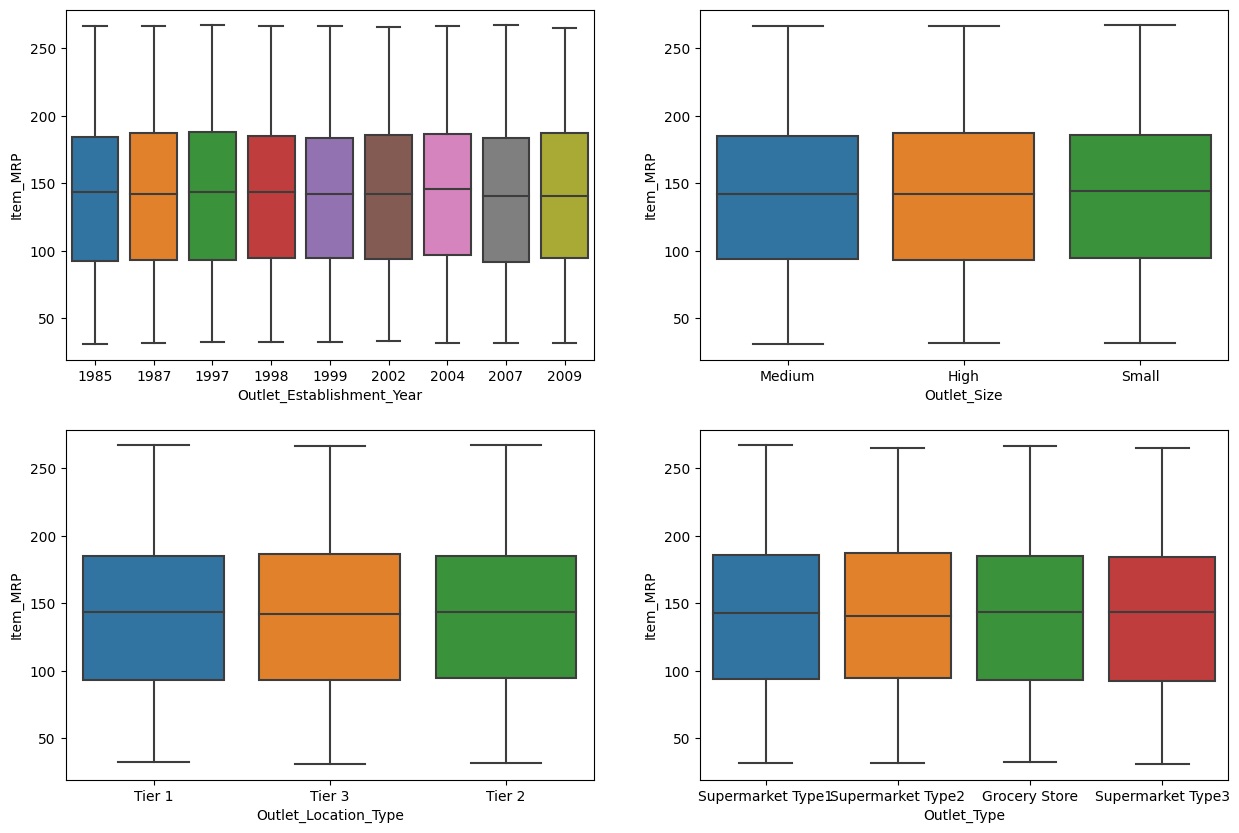

In [34]:
# next let us look at item MRP and categorical variables using subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(ax=axes[0, 0], x='Outlet_Establishment_Year', y='Item_MRP', data=data)
sns.boxplot(ax=axes[0, 1], x='Outlet_Size', y='Item_MRP', data=data)
sns.boxplot(ax=axes[1, 0], x='Outlet_Location_Type', y='Item_MRP', data=data)
sns.boxplot(ax=axes[1, 1], x='Outlet_Type', y='Item_MRP', data=data)
plt.show()


Nothing special about these box plots

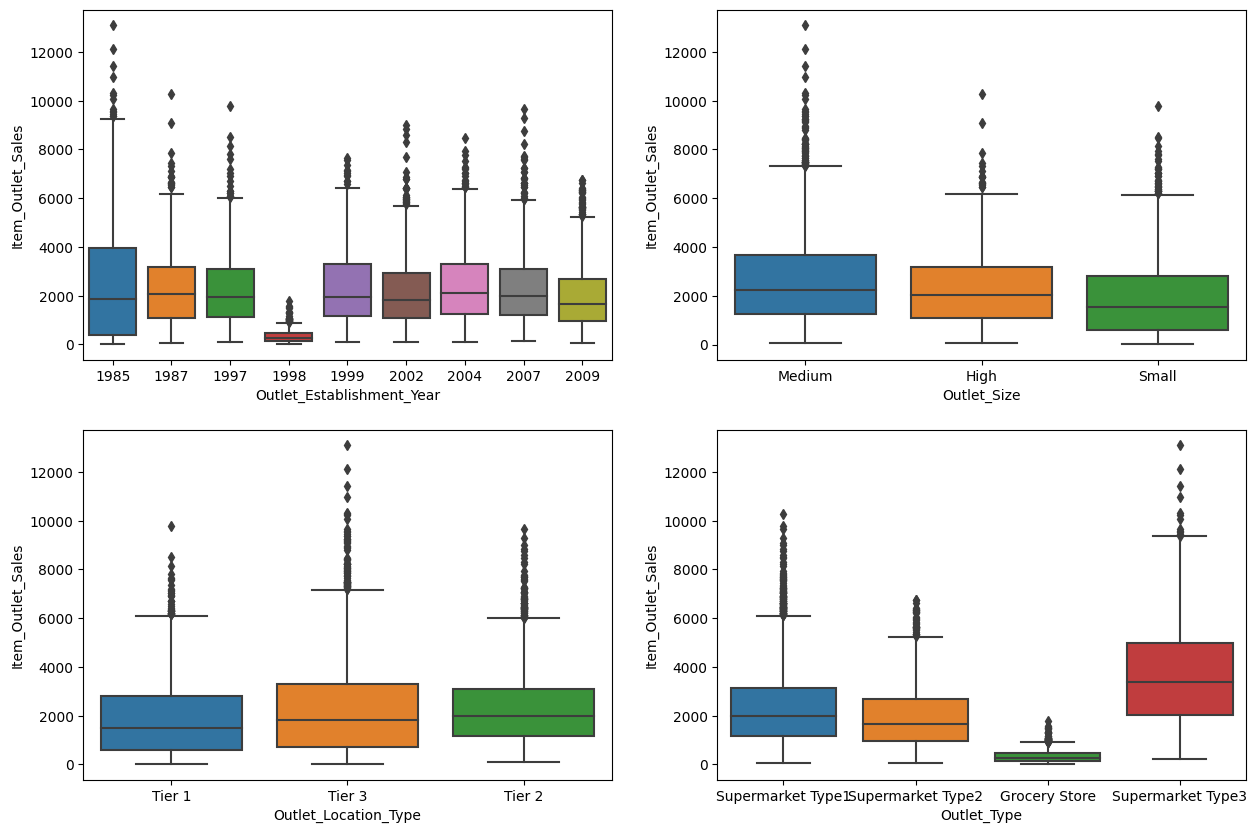

In [35]:
# next let us look at item outlet sales and categorical variables using subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.boxplot(ax=axes[0, 0], x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=data)
sns.boxplot(ax=axes[0, 1], x='Outlet_Size', y='Item_Outlet_Sales', data=data)
sns.boxplot(ax=axes[1, 0], x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data)
sns.boxplot(ax=axes[1, 1], x='Outlet_Type', y='Item_Outlet_Sales', data=data)
plt.show()

We can notice that this data closely resembles item visability column since the year 1998 has very low outlet sales and outlet_type at 0 has alos very low item_outlet_sales.


### 7 - Bivariate Analysis


The important variables together are (outlet_location_type and outlet_size, outlet_type and outlet_location_type, item_outlet_sales and item_MRP)

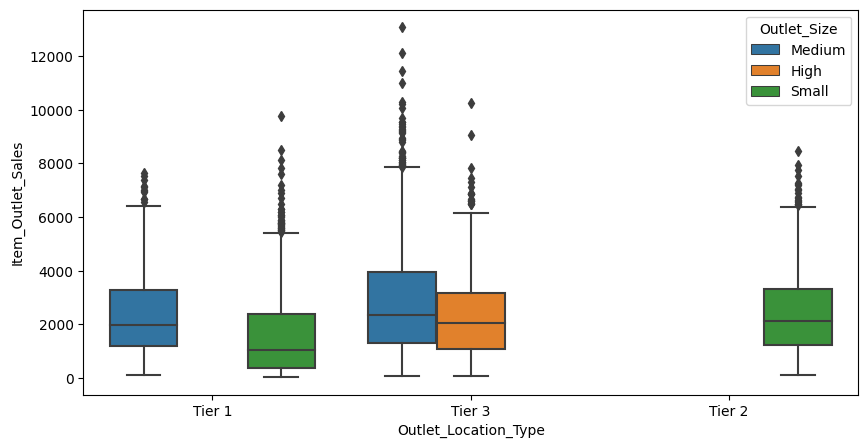

In [36]:
# so let us start with outlet_location_type and outlet_size with the target variable
plt.figure(figsize=(10, 5))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', hue='Outlet_Size', data=data)
plt.show()

This can be usefull in the feature engineering part

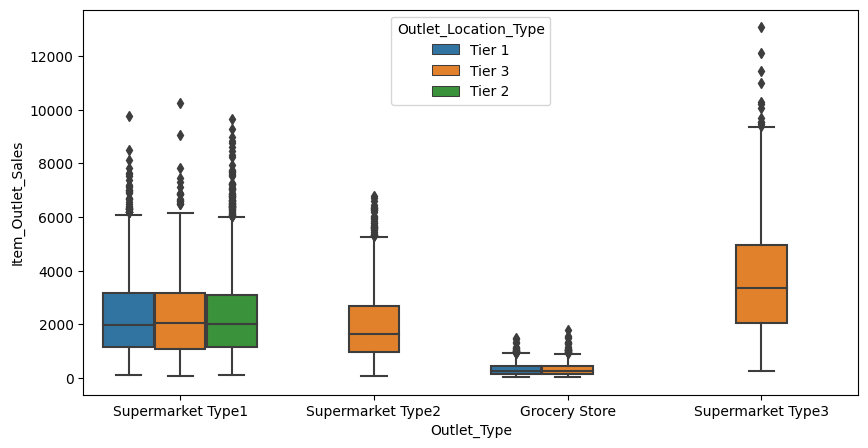

In [37]:
# lets us look at the outlet type and outlet location with the target variable
plt.figure(figsize=(10, 5))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Location_Type', data=data)
plt.show()


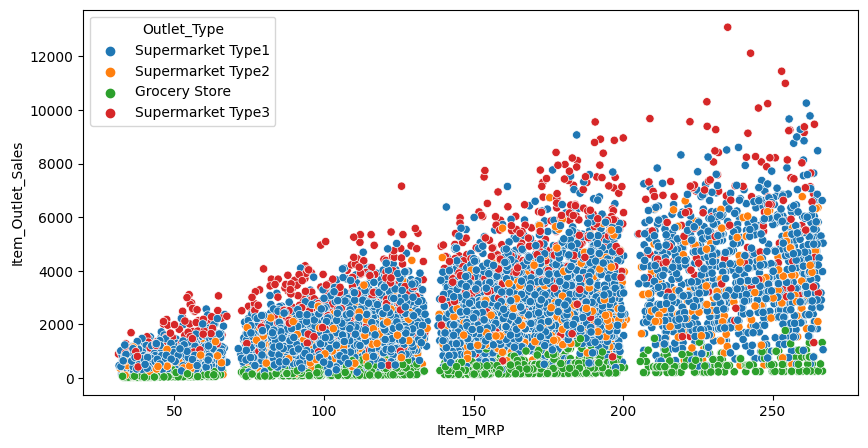

In [38]:
# let us look at item mrp and outlet sales
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', hue='Outlet_Type', data=data)
plt.show()



### 8 - Missing Value Treatment


In [39]:
# treating the missing values in the weight column
# when we looked at the distribution of the item weight we saw that it was sowhat normally distributed so we will use the mean to fill the missing values
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace=True)

In [40]:
# there seems to be a big number of nan data in this column so we will replace them with the mode of the column since deleting them will affect the model
data['Outlet_Size'] = data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])
data['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB



### 9 - Feature Engineering



### 10 - Encoding Categorical Variables

In [42]:
# getting all the object type columns
data.select_dtypes(include=['object'])

Item_Identifier Item_Fat_Content              Item_Type   
0              FDA15          Low Fat                  Dairy  \
1              DRC01          Regular            Soft Drinks   
2              FDN15          Low Fat                   Meat   
3              FDX07          Regular  Fruits and Vegetables   
4              NCD19          Low Fat              Household   
...              ...              ...                    ...   
8518           FDF22          Low Fat            Snack Foods   
8519           FDS36          Regular           Baking Goods   
8520           NCJ29          Low Fat     Health and Hygiene   
8521           FDN46          Regular            Snack Foods   
8522           DRG01          Low Fat            Soft Drinks   

     Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  
0               OUT049      Medium               Tier 1  Supermarket Type1  
1               OUT018      Medium               Tier 3  Supermarket Type2  
2               OUT049      Medium               Tier 1  Supermarket Type1  
3               OUT010      Medium               Tier 3      Grocery Store  
4               OUT013        High               Tier 3  Supermarket Type1  
...                ...         ...                  ...                ...  
8518            OUT013        High               Tier 3  Supermarket Type1  
8519            OUT045      Medium               Tier 2  Supermarket Type1  
8520            OUT035       Small               Tier 2  Supermarket Type1  
8521            OUT018      Medium               Tier 3  Supermarket Type2  
8522            OUT046       Small               Tier 1  Supermarket Type1  

[8523 rows x 7 columns]

In [43]:
# starting with the Item_Fat_Content column and checking its unique values
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [44]:
# there seems to be some inconsistency in the values of this column so we will fix that
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('reg', 'Regular')
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [45]:
# to use this data in our model we need to convert it to numerical data
# we will use the encode low fat as 0 and regular as 1

data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(['Low Fat', 'Regular'], [0, 1])
data['Item_Fat_Content'].unique()

array([0, 1])

### 11 - Label Encoding

In [46]:
# next looking at the Outlet_Size column
data['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [47]:
# there seems to be some inconsistency in the values of this column so we will fix that
data['Outlet_Size'] = data['Outlet_Size'].replace(['Medium', 'Small', 'High'], [2, 1, 3])
data['Outlet_Size'].unique()

array([2, 3, 1])

In [48]:
# there seems to be no inconsistency in the values of this column so we will leave it as it is but we will convert it to numerical data
data['Outlet_Type'] = data['Outlet_Type'].replace([ 'Grocery Store','Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'], [0, 1, 2, 3])
data['Outlet_Type'].unique()

array([1, 2, 0, 3])


### 12 - One Hot Encoding


In [49]:
# next looking at the Item_Type column
data['Item_Type'].unique()



array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [50]:
# later in the test data I discovered some inconsistancies in the data so I desided to group the data into 3 categories
# Food, Non-Consumable, Drinks

data['Item_Type'] = data['Item_Type'].replace(['Fruits and Vegetables', 'Snack Foods', 'Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene', 'Soft Drinks', 'Meat', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods', 'Breakfast', 'Seafood'], ['Food', 'Food', 'Food', 'Food', 'Food', 'Food', 'Non-Consumable', 'Drinks', 'Food', 'Food', 'Drinks', 'Food', 'Food', 'Food', 'Food'])

data['Item_Type'].unique()

array(['Food', 'Drinks', 'Household', 'Non-Consumable'], dtype=object)

In [51]:
# there seems to be no inconsistency in the values of this column so we will leave it as it is but we will convert it to numerical data
# we will use the onehot encoding technique to convert this column to numerical data
data = pd.get_dummies(data, columns=['Item_Type'])

data.head()


Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP   
0           FDA15         9.30                 0         0.016047  249.8092  \
1           DRC01         5.92                 1         0.019278   48.2692   
2           FDN15        17.50                 0         0.016760  141.6180   
3           FDX07        19.20                 1         0.000000  182.0950   
4           NCD19         8.93                 0         0.000000   53.8614   

  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size   
0            OUT049                       1999            2  \
1            OUT018                       2009            2   
2            OUT049                       1999            2   
3            OUT010                       1998            2   
4            OUT013                       1987            3   

  Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  Item_Type_Drinks   
0               Tier 1            1          3735.1380             False  \
1               Tier 3            2           443.4228              True   
2               Tier 1            1          2097.2700             False   
3               Tier 3            0           732.3800             False   
4               Tier 3            1           994.7052             False   

   Item_Type_Food  Item_Type_Household  Item_Type_Non-Consumable  
0            True                False                     False  
1           False                False                     False  
2            True                False                     False  
3            True                False                     False  
4           False                 True                     False

In [52]:
# next looking at the Outlet_Location_Type column
data['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [53]:
# there seems to be no inconsistency in the values of this column so we will leave it as it is but we will convert it to numerical data
# we will use the onehot encoding technique to convert this column to numerical data
data = pd.get_dummies(data, columns=['Outlet_Location_Type'])

data.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP   
0           FDA15         9.30                 0         0.016047  249.8092  \
1           DRC01         5.92                 1         0.019278   48.2692   
2           FDN15        17.50                 0         0.016760  141.6180   
3           FDX07        19.20                 1         0.000000  182.0950   
4           NCD19         8.93                 0         0.000000   53.8614   

  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Type   
0            OUT049                       1999            2            1  \
1            OUT018                       2009            2            2   
2            OUT049                       1999            2            1   
3            OUT010                       1998            2            0   
4            OUT013                       1987            3            1   

   Item_Outlet_Sales  Item_Type_Drinks  Item_Type_Food  Item_Type_Household   
0          3735.1380             False            True                False  \
1           443.4228              True           False                False   
2          2097.2700             False            True                False   
3           732.3800             False            True                False   
4           994.7052             False           False                 True   

   Item_Type_Non-Consumable  Outlet_Location_Type_Tier 1   
0                     False                         True  \
1                     False                        False   
2                     False                         True   
3                     False                        False   
4                     False                        False   

   Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  
0                        False                        False  
1                        False                         True  
2                        False                        False  
3                        False                         True  
4                        False                         True

In [54]:
# one hot encoding the outlet type column
data = pd.get_dummies(data, columns=['Outlet_Type'])

data.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP   
0           FDA15         9.30                 0         0.016047  249.8092  \
1           DRC01         5.92                 1         0.019278   48.2692   
2           FDN15        17.50                 0         0.016760  141.6180   
3           FDX07        19.20                 1         0.000000  182.0950   
4           NCD19         8.93                 0         0.000000   53.8614   

  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size   
0            OUT049                       1999            2  \
1            OUT018                       2009            2   
2            OUT049                       1999            2   
3            OUT010                       1998            2   
4            OUT013                       1987            3   

   Item_Outlet_Sales  Item_Type_Drinks  Item_Type_Food  Item_Type_Household   
0          3735.1380             False            True                False  \
1           443.4228              True           False                False   
2          2097.2700             False            True                False   
3           732.3800             False            True                False   
4           994.7052             False           False                 True   

   Item_Type_Non-Consumable  Outlet_Location_Type_Tier 1   
0                     False                         True  \
1                     False                        False   
2                     False                         True   
3                     False                        False   
4                     False                        False   

   Outlet_Location_Type_Tier 2  Outlet_Location_Type_Tier 3  Outlet_Type_0   
0                        False                        False          False  \
1                        False                         True          False   
2                        False                        False          False   
3                        False                         True           True   
4                        False                         True          False   

   Outlet_Type_1  Outlet_Type_2  Outlet_Type_3  
0           True          False          False  
1          False           True          False  
2           True          False          False  
3          False          False          False  
4           True          False          False

### 13 - PreProcessing Data


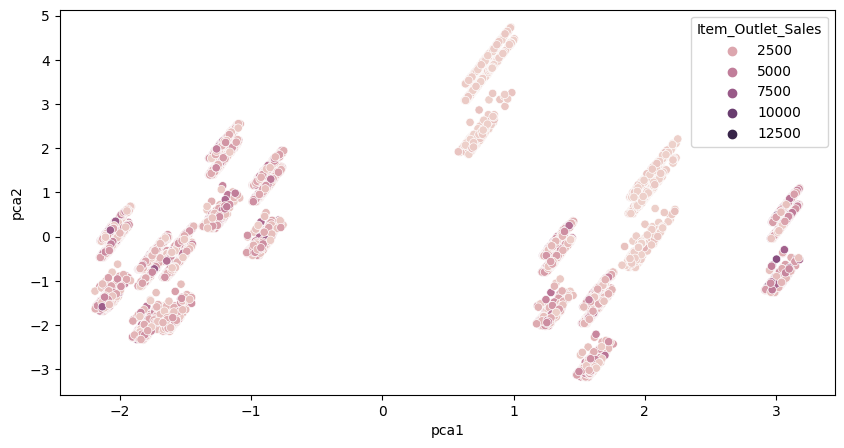

In [55]:
# using PCA to reduce the dimensionality of the data
# importing the pca libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# first we will drop the id columns since they are just unique identifiers
data_pca = data.drop(['Item_Identifier', 'Outlet_Identifier','Item_Outlet_Sales'], axis=1)

# next we will encode the categorical variables
data_pca = pd.get_dummies(data_pca)

# next we will scale the data
scaler = StandardScaler()
data_pca_scaled = scaler.fit_transform(data_pca)

# next we will use PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
data_pca_scaled_pca = pca.fit_transform(data_pca_scaled)

# next we will create a dataframe from the pca data
data_pca_scaled_pca_df = pd.DataFrame(data_pca_scaled_pca, columns=['pca1', 'pca2'])

# next we will add the target variable to the pca dataframe
data_pca_scaled_pca_df['Item_Outlet_Sales'] = data['Item_Outlet_Sales']

# next we will plot the pca data
plt.figure(figsize=(10, 5))
sns.scatterplot(x='pca1', y='pca2', hue='Item_Outlet_Sales', data=data_pca_scaled_pca_df)
plt.show()


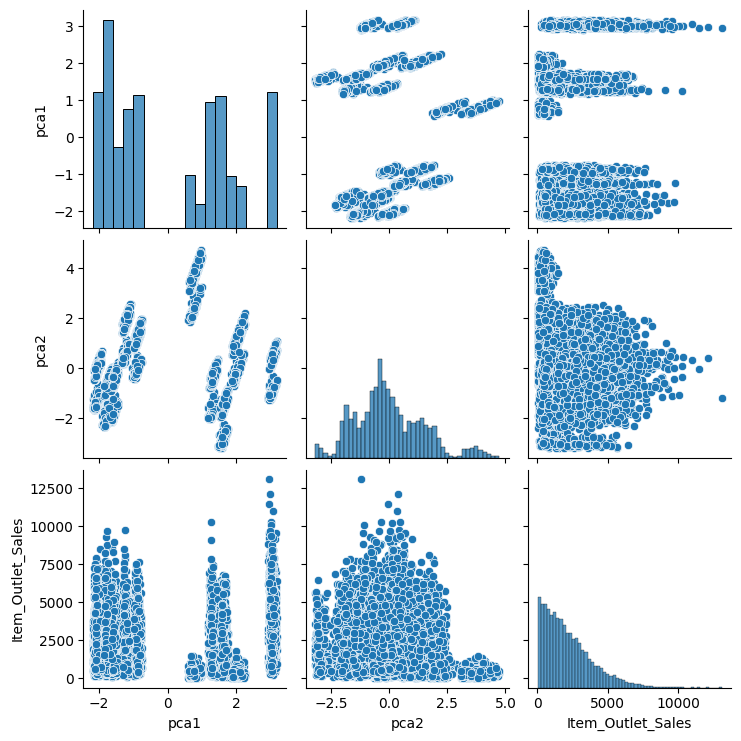

In [56]:
# next we will look at a pairplot of the pca data
sns.pairplot(data_pca_scaled_pca_df)
plt.show()

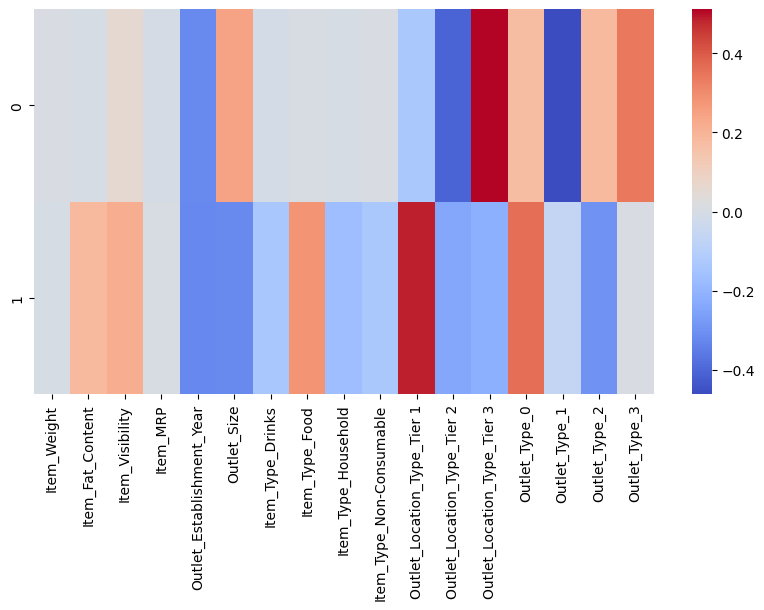

In [57]:
# next we will use the pca components to create a dataframe
pca_df = pd.DataFrame(pca.components_, columns=data_pca.columns)

# next we will plot the pca dataframe
plt.figure(figsize=(10, 5))
sns.heatmap(pca_df, cmap='coolwarm')
plt.show()

In [58]:
# showing the pca explained data
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())




[0.18346263 0.12675398]
0.3102166165884891


The pca does not show a high variance ratio so we will not use it to train the model

In [59]:
# next we will use the original data to train our model
# first we will drop the id columns since they are just unique identifiers

train_data = data.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

# since categorical variables are encoded as numerical data we will not need to encode them

# next we will split the data into train and test data  

train_data = train_data.drop('Item_Outlet_Sales', axis=1)

# next we will scale the data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)

# next we will create the train and test data
X_train, X_test, y_train, y_test = train_test_split(train_data_scaled, data['Item_Outlet_Sales'], test_size=0.2, random_state=42)



### 14 - Modeling


### 15 - Linear Regression


The accuracy of the model is:  0.5793874133952828
The rmse of the model is:  1069.2111204219


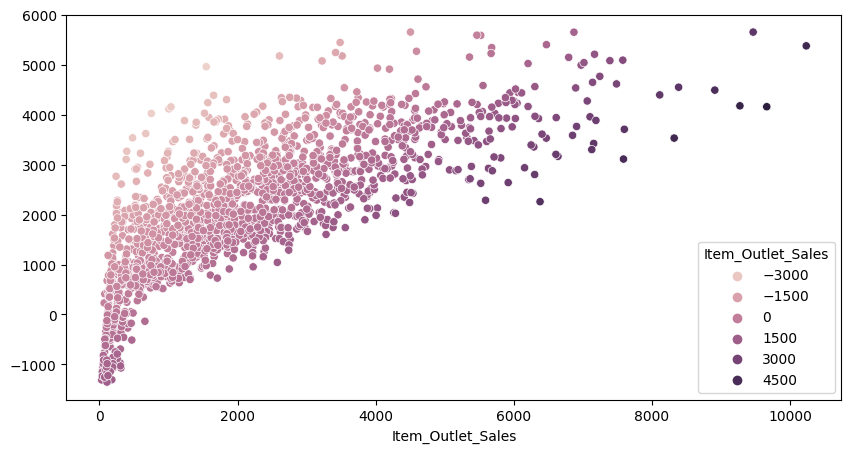

In [60]:
# next we will train the model
# first we will import the libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# next we will create the model
model = LinearRegression()

# next we will fit the model
model.fit(X_train, y_train)

# next we will make predictions
y_pred = model.predict(X_test)

# next we will check the accuracy of the model
print('The accuracy of the model is: ', model.score(X_test, y_test))

# next we will check the rmse of the model
print('The rmse of the model is: ', np.sqrt(mean_squared_error(y_test, y_pred)))



# next we will plot the predictions vs the actual values
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred, hue=y_test-y_pred)
plt.show()


### 16 - Regularized Linear Regression


The accuracy of the model is:  0.5797074563626703
The rmse of the model is:  1068.8042631036164


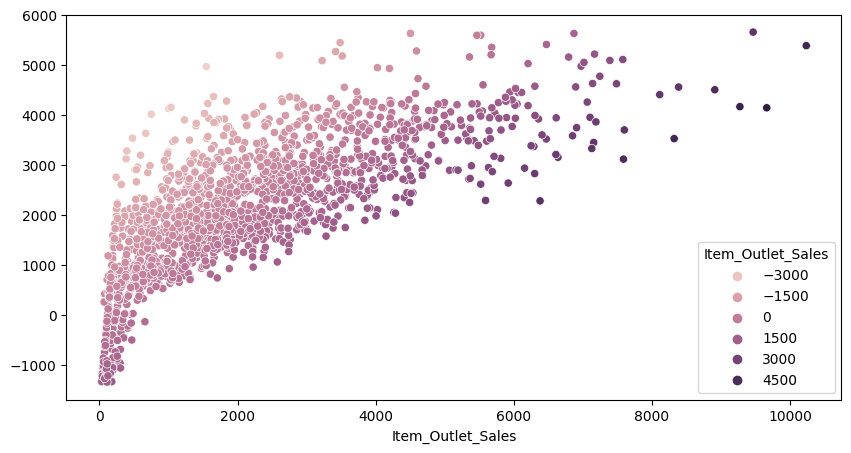

In [61]:
# using the regularized linear regression model
# first we will import the libraries
from sklearn.linear_model import Ridge

# next we will create the model
model = Ridge()

# next we will fit the model
model.fit(X_train, y_train)

# next we will make predictions
y_pred = model.predict(X_test)

# next we will check the accuracy of the model
print('The accuracy of the model is: ', model.score(X_test, y_test))

# next we will check the rmse of the model
print('The rmse of the model is: ', np.sqrt(mean_squared_error(y_test, y_pred)))


# next we will plot the predictions vs the actual values
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred, hue=y_test-y_pred)
plt.show()

### 17 - RandomForest


The accuracy of the model is:  0.5620610110605166
The rmse of the model is:  1091.0110278736452


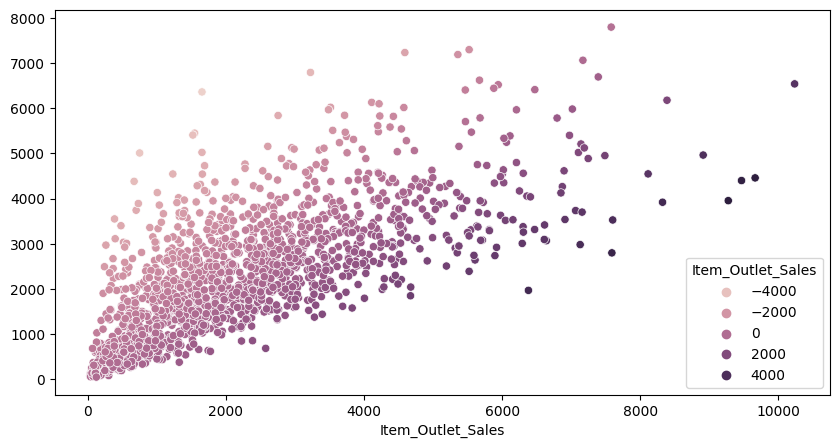

In [62]:
# using random forest regressor

# first we will import the libraries
from sklearn.ensemble import RandomForestRegressor

# next we will create the model
model = RandomForestRegressor()

# next we will fit the model
model.fit(X_train, y_train)

# next we will make predictions
y_pred = model.predict(X_test)

# next we will check the accuracy of the model
print('The accuracy of the model is: ', model.score(X_test, y_test))

# next we will check the rmse of the model
print('The rmse of the model is: ', np.sqrt(mean_squared_error(y_test, y_pred)))

# next we will plot the predictions vs the actual values

plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred, hue=y_test-y_pred)
plt.show()



### 18 - XGBoost


The accuracy of the model is:  0.5427867484949744
The rmse of the model is:  1114.7609302676346


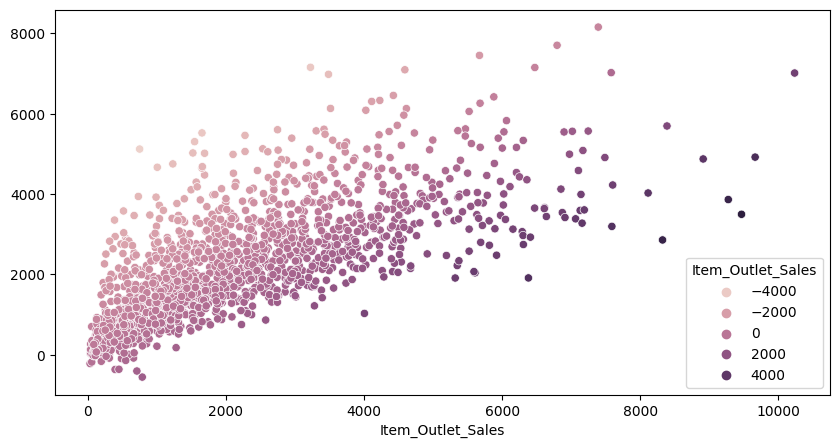

In [63]:
# using xgboost regressor

# first we will import the libraries
from xgboost import XGBRegressor

# next we will create the model
model = XGBRegressor()

# next we will fit the model
model.fit(X_train, y_train)

# next we will make predictions
y_pred = model.predict(X_test)

# next we will check the accuracy of the model
print('The accuracy of the model is: ', model.score(X_test, y_test))

# next we will check the rmse of the model
print('The rmse of the model is: ', np.sqrt(mean_squared_error(y_test, y_pred)))

# next we will plot the predictions vs the actual values with color coding showing the error
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred, hue=y_test-y_pred)
plt.show()



In [64]:
# let us test the model on the test data file we need to do all the preprocessing we did on the train data 

# first we will load the test data
test_data = pd.read_csv('test.csv')

# next we will check the head of the data
test_data.head()


Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type   
0           FDW58       20.750          Low Fat         0.007565  Snack Foods  \
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size   
0  107.8622            OUT049                       1999      Medium  \
1   87.3198            OUT017                       2007         NaN   
2  241.7538            OUT010                       1998         NaN   
3  155.0340            OUT017                       2007         NaN   
4  234.2300            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [65]:
# we need to do the same preprocessing we did on the train data
# first we will check the shape of the data
test_data.shape



(5681, 11)

In [66]:
# next we will check the info of the data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [67]:
# there seems to be some missing values in the data
# next we will check the missing values in the data
test_data.isnull().sum()


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [68]:
# let us add the missing values in the weight column in the original data we used the mean of the weight column to fill the missing values
# we will do the same here
test_data['Item_Weight'] = test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean())

In [69]:
# we will treat the missing values 
# first we will check the categorical variables
test_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64

In [70]:
# looks like there are some values that are mislabeled
# we will replace the mislabeled values
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})

# next we will check the unique values in the data
test_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [71]:
# now let us check the outlet size
test_data['Outlet_Size'].value_counts()

Outlet_Size
Medium    1862
Small     1592
High       621
Name: count, dtype: int64

In [72]:
# in the test data we replaced the missing values with the mode of the data
# so lets us do the same here
test_data['Outlet_Size'] = test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0])

In [73]:
# now let us do the same encoding we did on the train data
# first we will encode the categorical variables
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace({'Low Fat': 0, 'Regular': 1})
test_data['Outlet_Size'] = test_data['Outlet_Size'].replace({'Small': 0, 'Medium': 1, 'High': 2})
# next we will check the head of the data
test_data.head()



Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility   
0           FDW58    20.750000                 0         0.007565  \
1           FDW14     8.300000                 1         0.038428   
2           NCN55    14.600000                 0         0.099575   
3           FDQ58     7.315000                 0         0.015388   
4           FDY38    12.695633                 1         0.118599   

     Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year   
0  Snack Foods  107.8622            OUT049                       1999  \
1        Dairy   87.3198            OUT017                       2007   
2       Others  241.7538            OUT010                       1998   
3  Snack Foods  155.0340            OUT017                       2007   
4        Dairy  234.2300            OUT027                       1985   

   Outlet_Size Outlet_Location_Type        Outlet_Type  
0            1               Tier 1  Supermarket Type1  
1            1               Tier 2  Supermarket Type1  
2            1               Tier 3      Grocery Store  
3            1               Tier 2  Supermarket Type1  
4            1               Tier 3  Supermarket Type3

In [74]:
# let us check the different categories in the item type
test_data['Item_Type'].value_counts()

# comparining them with the test data 
# we will group the categories into 4 categories
# household, food, drinks, non-consumable

# first we will create a function to group the categories
def item_type(x):
    if x in ['Household', 'Others']:
        return 'Household'
    elif x in ['Fruits and Vegetables', 'Snack Foods', 'Frozen Foods', 'Breakfast', 'Canned', 'Breads', 'Starchy Foods']:
        return 'Food'
    elif x in ['Soft Drinks', 'Hard Drinks', 'Health and Hygiene']:
        return 'Drinks'
    else:
        return 'Non-Consumable'
    
# next we will apply the function to the item type column
test_data['Item_Type'] = test_data['Item_Type'].apply(item_type)


test_data['Item_Type'].value_counts()




Item_Type
Food              2937
Non-Consumable    1228
Drinks             767
Household          749
Name: count, dtype: int64

In [75]:
# now let use the same hot encoding we did on the train data
# first we will create the dummy variables
dummy = pd.get_dummies(test_data['Item_Type'])

# next we will concatenate the dummy variables with the original data
test_data = pd.concat([test_data, dummy], axis=1)

# next we will drop the item type column
test_data.drop('Item_Type', axis=1, inplace=True)

# next we will check the head of the data
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   int64  
 3   Item_Visibility            5681 non-null   float64
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Identifier          5681 non-null   object 
 6   Outlet_Establishment_Year  5681 non-null   int64  
 7   Outlet_Size                5681 non-null   int64  
 8   Outlet_Location_Type       5681 non-null   object 
 9   Outlet_Type                5681 non-null   object 
 10  Drinks                     5681 non-null   bool   
 11  Food                       5681 non-null   bool   
 12  Household                  5681 non-null   bool   
 13  Non-Consumable             5681 non-null   bool 

In [76]:
# we also did the same for the outlet location type
# first we will create the dummy variables
dummy = pd.get_dummies(test_data['Outlet_Location_Type'])

# next we will concatenate the dummy variables with the original data
test_data = pd.concat([test_data, dummy], axis=1)

# next we will drop the outlet location type column
test_data.drop('Outlet_Location_Type', axis=1, inplace=True)

# next we will check the info of the data
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   int64  
 3   Item_Visibility            5681 non-null   float64
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Identifier          5681 non-null   object 
 6   Outlet_Establishment_Year  5681 non-null   int64  
 7   Outlet_Size                5681 non-null   int64  
 8   Outlet_Type                5681 non-null   object 
 9   Drinks                     5681 non-null   bool   
 10  Food                       5681 non-null   bool   
 11  Household                  5681 non-null   bool   
 12  Non-Consumable             5681 non-null   bool   
 13  Tier 1                     5681 non-null   bool 

In [77]:
# so we will add the outlet type column to the test data
# first we will check the unique values in the outlet type column
test_data['Outlet_Type'].unique()

# next we will create the dummy variables
dummy = pd.get_dummies(test_data['Outlet_Type'])

# next we will concatenate the dummy variables with the original data
test_data = pd.concat([test_data, dummy], axis=1)

# next we will drop the outlet type column
test_data.drop('Outlet_Type', axis=1, inplace=True)

# next we will check the info of the data
test_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   int64  
 3   Item_Visibility            5681 non-null   float64
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Identifier          5681 non-null   object 
 6   Outlet_Establishment_Year  5681 non-null   int64  
 7   Outlet_Size                5681 non-null   int64  
 8   Drinks                     5681 non-null   bool   
 9   Food                       5681 non-null   bool   
 10  Household                  5681 non-null   bool   
 11  Non-Consumable             5681 non-null   bool   
 12  Tier 1                     5681 non-null   bool   
 13  Tier 2                     5681 non-null   bool 

In [78]:
scaler = StandardScaler()
# removing the id columns
scaled_test_data = test_data.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1)

# next we will scale the data
scaled_test_data = scaler.fit_transform(scaled_test_data)

scaled_test_data

array([[ 1.89745979, -0.74081066, -1.13407715, ...,  0.72689965,
        -0.34937375, -0.35127385],
       [-1.03552991,  1.34987258, -0.53185019, ...,  0.72689965,
        -0.34937375, -0.35127385],
       [ 0.44863355, -0.74081066,  0.6613164 , ..., -1.37570571,
        -0.34937375, -0.35127385],
       ...,
       [-0.63504136, -0.74081066,  0.15307374, ...,  0.72689965,
        -0.34937375, -0.35127385],
       [ 0.6135406 ,  1.34987258, -1.28168987, ...,  0.72689965,
        -0.34937375, -0.35127385],
       [-0.75283211,  1.34987258,  0.76171558, ...,  0.72689965,
        -0.34937375, -0.35127385]])

In [79]:
train_data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Item_Type_Drinks',
       'Item_Type_Food', 'Item_Type_Household', 'Item_Type_Non-Consumable',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3'],
      dtype='object')

In [80]:
test_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Drinks', 'Food', 'Household', 'Non-Consumable',
       'Tier 1', 'Tier 2', 'Tier 3', 'Grocery Store', 'Supermarket Type1',
       'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [81]:
# let us compare the columns in the train data and the test data to see what we are missing 

# we are missing the outlet establishment year column in the test data
# so we will add that column to the test data

# first we will check the unique values in the outlet establishment year column
test_data['Outlet_Establishment_Year'].unique()

# next we will create the dummy variables
dummy = pd.get_dummies(test_data['Outlet_Establishment_Year'])

# next we will concatenate the dummy variables with the original data
test_data = pd.concat([test_data, dummy], axis=1)


In [82]:
# now let us make predictions on the test data and add the predictions to the test data
# first we will make predictions
predictions = model.predict(scaled_test_data)

# next we will add the predictions to the test data
test_data['Predictions'] = predictions

# let us save the predictions to a csv file
test_data.to_csv('predictions.csv')

### 19 - Summary

### From our exploration above we can clearly see that


1. Product Type Hypothesis: We hypothesize that certain product types will have a higher demand and sales volume compared to others. By analyzing the sales data, we expect to identify specific product categories that exhibit stronger sales performance.

* This turned out to be true indeed some product types had huge variation in sales 

2. Price Impact Hypothesis: We anticipate that product pricing will have a significant influence on sales. Through data analysis, we aim to uncover any price thresholds or optimal price ranges that maximize sales and revenue.

* This is also true since we found out that Item_MRP clearly maximises the Outlet sales.

3. Outlet Location Hypothesis: We hypothesize that the location of outlets plays a role in sales performance. By analyzing sales data in relation to outlet location types, we expect to identify any patterns or variations in sales across different areas.

* This did not turn out so true since the different outlet locations had very close sales

4. Outlet Type Hypothesis: We anticipate that different outlet types (supermarkets, convenience stores, hypermarkets) will have varying sales patterns. Through analysis, we aim to identify the outlet types that exhibit the highest sales potential.

* This indeed had a difference on the different sales

### From our modeling that 

1. the best preforming model was Regularized linear regression and normal linear regression

2. this is not a final result as only testing for accuracy does always show the ture picture so somme further analysis of result maybe warented 